In [ ]:
import numpy as np
import sklearn as sl
import pandas as pd 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from google.colab import files
from math import sqrt
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler


In [ ]:
# The following code will mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/Project 3/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Project 3/test.csv')

train

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,136987.0,2.163444,-0.644746,-1.433580,-0.551483,-0.308032,-0.784711,-0.262851,-0.333957,-0.681305,0.944821,-0.957929,0.038056,0.910316,0.126584,0.510546,-1.389698,-0.327507,1.115605,-0.969381,-0.493501,-0.130868,0.148720,0.123376,0.709502,-0.025768,0.762311,-0.067192,-0.053168,29.85,0
1,1,3275.0,0.754326,-1.268480,0.335702,-0.106730,-0.626858,1.152636,-0.607401,0.373445,0.953527,-0.362365,0.043261,0.584805,-0.191886,-0.162470,0.019728,0.496319,-0.487418,0.181503,0.578114,0.423497,0.017592,-0.321938,-0.290982,-1.190304,0.079270,1.058226,-0.071698,0.030951,250.81,0
2,2,139251.0,-9.029467,-9.132147,-2.887555,0.090064,1.573449,0.071661,-1.155863,0.608796,0.129538,0.292029,0.556756,0.563458,0.384309,0.112719,-0.203818,1.708882,0.502780,-2.496774,-0.134922,-2.134296,-0.627635,-0.826966,-2.865835,-0.606234,-1.615866,-0.867707,-0.694600,1.231114,217.08,0
3,3,87196.0,-2.019503,1.285725,-1.571545,-2.875727,1.230119,-1.470084,1.645524,-0.286543,1.151744,1.046003,0.849712,0.915621,-0.167999,-0.030073,-1.787682,-0.469691,-0.954199,-0.395718,-0.584467,0.301824,-0.127970,0.926986,0.098861,0.843026,-0.026485,0.410614,0.004070,-0.371330,8.00,0
4,4,172329.0,-2.583118,2.936337,-1.960681,-0.190599,-1.536309,-2.011599,-0.712777,1.800044,-0.271601,-0.197815,-0.609051,1.516718,0.923711,1.631211,0.220552,-0.268920,0.668168,-0.186622,-0.518438,-0.035834,0.535812,1.441718,0.270734,0.914286,-0.575906,-0.245615,0.314288,0.252057,0.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213600,213600,134608.0,-0.162291,0.002930,-2.218125,-1.090438,2.794118,3.381765,0.982504,0.744369,-0.332199,-1.163011,0.240801,-0.366277,-0.257058,-0.665085,1.137049,0.036617,0.424407,0.721485,-0.354641,0.446440,0.433127,0.861229,0.342264,0.602551,-0.264427,-0.142182,0.088597,0.142627,210.20,0
213601,213601,77909.0,1.231961,-0.434463,-0.353181,-0.312596,1.433186,3.956628,-1.201919,1.071643,0.797960,-0.181066,-0.505376,0.268831,0.001655,-0.266008,0.387423,0.489388,-0.674259,0.209296,0.331169,0.028835,-0.143435,-0.376046,-0.006577,1.039655,0.413009,0.331772,0.018791,0.020935,11.50,0
213602,213602,35356.0,1.239514,-0.302430,0.502809,0.401010,-0.751680,-0.365679,-0.363307,-0.038675,-0.968543,0.739468,-0.377788,-0.100890,0.016897,0.281246,1.176721,-1.548154,0.070638,0.601984,-1.415320,-0.537054,-0.550365,-1.170669,0.192421,-0.013875,0.164536,-0.601729,0.059366,0.035688,33.50,0
213603,213603,65760.0,-1.412196,-0.453461,2.559004,1.926669,-1.351752,0.739688,-0.857633,0.822492,0.889296,-0.979147,-1.575932,1.146614,1.026108,-1.084174,-1.235701,-0.818017,0.731709,0.341010,1.158835,0.463541,0.390266,1.137252,0.086594,0.482070,-0.121143,-0.055548,0.119365,0.011951,141.25,0


In [ ]:
train.columns = ["ID_CHANGE"]

TypeError: ignored

## RESAMPLE TO REDUCE DATA IMBALANCE

In [ ]:
#Utilize SMOTE to balance the data with resampling
train = train.drop('id',axis = 1)
train

from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
train_X, train_Y = sm.fit_resample(train.drop('Class', axis=1), train['Class'])
oversampled = pd.concat([pd.DataFrame(train_Y), pd.DataFrame(train_X)], axis=1)

oversampled

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,136987.000000,2.163444,-0.644746,-1.433580,-0.551483,-0.308032,-0.784711,-0.262851,-0.333957,-0.681305,0.944821,-0.957929,0.038056,0.910316,0.126584,0.510546,-1.389698,-0.327507,1.115605,-0.969381,-0.493501,-0.130868,0.148720,0.123376,0.709502,-0.025768,0.762311,-0.067192,-0.053168,29.850000
1,0,3275.000000,0.754326,-1.268480,0.335702,-0.106730,-0.626858,1.152636,-0.607401,0.373445,0.953527,-0.362365,0.043261,0.584805,-0.191886,-0.162470,0.019728,0.496319,-0.487418,0.181503,0.578114,0.423497,0.017592,-0.321938,-0.290982,-1.190304,0.079270,1.058226,-0.071698,0.030951,250.810000
2,0,139251.000000,-9.029467,-9.132147,-2.887555,0.090064,1.573449,0.071661,-1.155863,0.608796,0.129538,0.292029,0.556756,0.563458,0.384309,0.112719,-0.203818,1.708882,0.502780,-2.496774,-0.134922,-2.134296,-0.627635,-0.826966,-2.865835,-0.606234,-1.615866,-0.867707,-0.694600,1.231114,217.080000
3,0,87196.000000,-2.019503,1.285725,-1.571545,-2.875727,1.230119,-1.470084,1.645524,-0.286543,1.151744,1.046003,0.849712,0.915621,-0.167999,-0.030073,-1.787682,-0.469691,-0.954199,-0.395718,-0.584467,0.301824,-0.127970,0.926986,0.098861,0.843026,-0.026485,0.410614,0.004070,-0.371330,8.000000
4,0,172329.000000,-2.583118,2.936337,-1.960681,-0.190599,-1.536309,-2.011599,-0.712777,1.800044,-0.271601,-0.197815,-0.609051,1.516718,0.923711,1.631211,0.220552,-0.268920,0.668168,-0.186622,-0.518438,-0.035834,0.535812,1.441718,0.270734,0.914286,-0.575906,-0.245615,0.314288,0.252057,0.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426467,1,91469.415434,-1.350398,2.542382,-3.910943,1.565241,1.697371,-1.894805,0.282227,-0.780513,0.857785,-3.838163,3.039441,-5.619835,1.192858,-6.854246,-0.635886,-0.451555,1.452497,1.184104,-1.412427,-0.233782,0.113274,-0.496850,-0.069892,0.216594,0.285106,-0.622331,-0.766917,0.234953,18.729434
426468,1,152251.632197,-3.922264,3.737294,-6.941827,6.928883,-0.734865,-1.677890,-3.056538,0.433456,-1.559586,-1.752025,3.738233,-7.216738,-0.875980,-11.361265,0.694512,-3.474690,-4.956009,-1.018090,0.671679,-0.171631,0.502643,0.673696,0.375591,-0.403249,-0.271668,0.302940,-2.300073,0.311559,1.233668
426469,1,56969.789547,-0.900454,2.261019,-2.763202,2.883588,-1.451716,-0.904070,-3.165982,1.121166,-2.325355,-4.470182,2.894102,-4.932415,-0.205909,-5.992731,0.496928,-4.433412,-6.821979,-2.873008,1.046969,0.491676,0.696797,0.140395,-0.197247,-0.357019,0.351356,0.588068,0.676468,0.292746,1.557335
426470,1,5298.774842,-4.047155,0.188739,-1.639330,2.578475,-0.483718,-1.540323,-2.506300,-0.201900,-0.253773,-3.775147,3.520365,-8.216554,0.311841,-5.455541,0.512766,-5.279522,-9.179900,-3.355515,0.301861,0.417379,0.596399,0.243926,0.033173,-0.115744,0.259500,-0.524839,-0.678367,0.638784,180.737154


In [ ]:
# Check to see if the oversampling worked. 
oversampled[oversampled.Class == 1]

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
914,1,62080.000000,-1.599457,2.607720,-2.987193,3.064156,-2.497914,-0.541103,-2.277786,1.268166,-1.997331,-3.834775,1.113354,-4.976921,-0.795531,-4.549557,1.813763,-3.177460,-5.369349,-1.121454,2.030592,0.225333,0.662933,0.184087,-0.089452,-0.506000,-0.062259,-0.052714,0.322854,0.135268,180.000000
980,1,71033.000000,-3.170818,0.185735,-3.399852,3.761155,-2.148047,-1.598944,-2.519565,1.316215,-2.400106,-4.993417,4.447192,-5.293760,-1.419578,-6.425276,0.914083,-3.515197,-6.347453,-0.903512,1.191606,1.932254,1.092051,-0.041080,0.904395,0.180016,0.049970,-0.257100,0.859282,0.225924,426.400000
4772,1,161154.000000,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,-3.065089,-7.509557,2.989626,-5.993632,-0.164740,-8.388443,0.042129,-4.137501,-6.103903,-1.972928,0.434073,-0.004301,1.043587,0.262189,-0.479224,-0.326638,-0.156939,0.113807,0.354124,0.287592,0.380000
6757,1,59385.000000,-7.626924,-6.976420,-2.077911,3.416754,4.458758,-5.080408,-6.578948,1.760341,-0.599509,-4.001742,2.611762,-2.210691,0.145323,-5.281678,-1.446227,-2.342178,-4.442082,-0.812202,0.254772,2.875260,1.224795,-0.656639,-0.330811,-0.078946,0.270306,0.431119,0.821381,-1.056088,18.980000
6846,1,148074.000000,-2.219219,0.727831,-5.458230,5.924850,3.932464,-3.085984,-1.677870,0.865075,-3.177260,-3.419207,3.693174,-3.978440,-1.718591,-8.636297,-0.242965,1.174884,2.134606,2.594365,-1.257589,0.964772,0.417472,-0.817343,-0.028752,0.025723,-0.825835,-0.013089,0.413291,-0.131387,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426467,1,91469.415434,-1.350398,2.542382,-3.910943,1.565241,1.697371,-1.894805,0.282227,-0.780513,0.857785,-3.838163,3.039441,-5.619835,1.192858,-6.854246,-0.635886,-0.451555,1.452497,1.184104,-1.412427,-0.233782,0.113274,-0.496850,-0.069892,0.216594,0.285106,-0.622331,-0.766917,0.234953,18.729434
426468,1,152251.632197,-3.922264,3.737294,-6.941827,6.928883,-0.734865,-1.677890,-3.056538,0.433456,-1.559586,-1.752025,3.738233,-7.216738,-0.875980,-11.361265,0.694512,-3.474690,-4.956009,-1.018090,0.671679,-0.171631,0.502643,0.673696,0.375591,-0.403249,-0.271668,0.302940,-2.300073,0.311559,1.233668
426469,1,56969.789547,-0.900454,2.261019,-2.763202,2.883588,-1.451716,-0.904070,-3.165982,1.121166,-2.325355,-4.470182,2.894102,-4.932415,-0.205909,-5.992731,0.496928,-4.433412,-6.821979,-2.873008,1.046969,0.491676,0.696797,0.140395,-0.197247,-0.357019,0.351356,0.588068,0.676468,0.292746,1.557335
426470,1,5298.774842,-4.047155,0.188739,-1.639330,2.578475,-0.483718,-1.540323,-2.506300,-0.201900,-0.253773,-3.775147,3.520365,-8.216554,0.311841,-5.455541,0.512766,-5.279522,-9.179900,-3.355515,0.301861,0.417379,0.596399,0.243926,0.033173,-0.115744,0.259500,-0.524839,-0.678367,0.638784,180.737154


In [ ]:

ids = pd.DataFrame(test["id"]) # Save the ID column for submission.
test = test.drop('id',axis = 1)

# Import the scaler to begin standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
temp_norm = train_X.append(test)

col_names = temp_norm.columns

#Apply the scaler to the merged data set
min_max_scaler = preprocessing.MinMaxScaler()
temp_norm = min_max_scaler.fit_transform(temp_norm)
temp_norm = pd.DataFrame(temp_norm, columns=col_names)

temp_norm

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.792786,0.995048,0.760455,0.812572,0.227483,0.763643,0.255130,0.263754,0.781803,0.439310,0.528270,0.228322,0.705627,0.518796,0.650309,0.374494,0.405157,0.721614,0.730020,0.487614,0.575011,0.559370,0.516969,0.667266,0.477839,0.576460,0.549970,0.415271,0.312045,0.001162
1,0.018953,0.971109,0.753874,0.843231,0.247199,0.761496,0.274608,0.261655,0.789391,0.495627,0.501225,0.287858,0.726234,0.433478,0.640590,0.337802,0.465136,0.716967,0.665775,0.608461,0.584775,0.561763,0.495013,0.661112,0.221841,0.582356,0.598307,0.415188,0.313752,0.009763
2,0.805888,0.804894,0.670901,0.787376,0.255923,0.776309,0.263740,0.258314,0.791916,0.467242,0.514764,0.318394,0.725429,0.478079,0.649843,0.321090,0.503697,0.745739,0.481572,0.552779,0.557540,0.551362,0.471453,0.622873,0.300544,0.487204,0.283710,0.403690,0.338107,0.008450
3,0.504630,0.923985,0.780825,0.810181,0.124452,0.773997,0.248239,0.275380,0.782312,0.502455,0.530363,0.335814,0.738703,0.435327,0.645042,0.202686,0.434415,0.703405,0.626076,0.517673,0.583479,0.559417,0.553275,0.666902,0.495832,0.576420,0.492521,0.416586,0.305588,0.000311
4,0.997320,0.914410,0.798241,0.803438,0.243481,0.755374,0.242795,0.261013,0.804694,0.453424,0.504629,0.249068,0.761358,0.519832,0.700900,0.352815,0.440800,0.750544,0.640457,0.522829,0.579884,0.570117,0.577287,0.669454,0.505434,0.545579,0.385328,0.422312,0.318239,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497669,0.898230,0.939930,0.784738,0.834226,0.212521,0.774044,0.259736,0.271171,0.789916,0.422753,0.481851,0.327796,0.727601,0.482827,0.622750,0.268446,0.465985,0.744799,0.689432,0.595123,0.581237,0.558055,0.479938,0.658887,0.410986,0.626636,0.505058,0.417831,0.314113,0.000056
497670,0.989166,0.932419,0.770672,0.832214,0.220698,0.762324,0.266420,0.264391,0.794654,0.483591,0.482768,0.160469,0.687079,0.397766,0.665722,0.407938,0.474384,0.711569,0.713644,0.541635,0.573493,0.565046,0.532507,0.657743,0.371954,0.590844,0.335586,0.412719,0.304812,0.006095
497671,0.870978,0.991778,0.766538,0.809661,0.269956,0.767485,0.252545,0.268409,0.781881,0.472124,0.510307,0.343673,0.755506,0.450808,0.667293,0.261039,0.426788,0.723389,0.632948,0.595228,0.578166,0.562748,0.528898,0.665601,0.389720,0.595159,0.385574,0.415787,0.311677,0.001167
497672,0.822677,0.988214,0.761597,0.810317,0.283455,0.771131,0.281235,0.261482,0.791690,0.510628,0.493003,0.259548,0.712736,0.378567,0.599372,0.337739,0.403782,0.795777,0.543058,0.447216,0.577232,0.565670,0.567484,0.665854,0.276562,0.576337,0.552215,0.417361,0.312265,0.001617


In [ ]:
train_df = temp_norm.iloc[:426472]
test_df = temp_norm.iloc[426472:]


In [ ]:
train_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.792786,0.995048,0.760455,0.812572,0.227483,0.763643,0.255130,0.263754,0.781803,0.439310,0.528270,0.228322,0.705627,0.518796,0.650309,0.374494,0.405157,0.721614,0.730020,0.487614,0.575011,0.559370,0.516969,0.667266,0.477839,0.576460,0.549970,0.415271,0.312045,0.001162
1,0.018953,0.971109,0.753874,0.843231,0.247199,0.761496,0.274608,0.261655,0.789391,0.495627,0.501225,0.287858,0.726234,0.433478,0.640590,0.337802,0.465136,0.716967,0.665775,0.608461,0.584775,0.561763,0.495013,0.661112,0.221841,0.582356,0.598307,0.415188,0.313752,0.009763
2,0.805888,0.804894,0.670901,0.787376,0.255923,0.776309,0.263740,0.258314,0.791916,0.467242,0.514764,0.318394,0.725429,0.478079,0.649843,0.321090,0.503697,0.745739,0.481572,0.552779,0.557540,0.551362,0.471453,0.622873,0.300544,0.487204,0.283710,0.403690,0.338107,0.008450
3,0.504630,0.923985,0.780825,0.810181,0.124452,0.773997,0.248239,0.275380,0.782312,0.502455,0.530363,0.335814,0.738703,0.435327,0.645042,0.202686,0.434415,0.703405,0.626076,0.517673,0.583479,0.559417,0.553275,0.666902,0.495832,0.576420,0.492521,0.416586,0.305588,0.000311
4,0.997320,0.914410,0.798241,0.803438,0.243481,0.755374,0.242795,0.261013,0.804694,0.453424,0.504629,0.249068,0.761358,0.519832,0.700900,0.352815,0.440800,0.750544,0.640457,0.522829,0.579884,0.570117,0.577287,0.669454,0.505434,0.545579,0.385328,0.422312,0.318239,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426467,0.529361,0.935352,0.794084,0.769643,0.321316,0.777143,0.243969,0.267075,0.777013,0.492329,0.429312,0.466028,0.492380,0.540666,0.415589,0.288790,0.434992,0.773333,0.734731,0.453016,0.577776,0.563306,0.486853,0.664396,0.411420,0.593910,0.323792,0.402355,0.317892,0.000729
426468,0.881127,0.891659,0.806692,0.717122,0.559082,0.760769,0.246150,0.246735,0.790035,0.409055,0.472473,0.507583,0.432192,0.380524,0.264047,0.388247,0.338851,0.587128,0.583271,0.615767,0.578438,0.569582,0.541459,0.671011,0.327897,0.562657,0.474933,0.374057,0.319446,0.000048
426469,0.329702,0.942996,0.791115,0.789531,0.379757,0.755943,0.253930,0.246068,0.797412,0.382676,0.416236,0.457386,0.518289,0.432392,0.444556,0.373476,0.308362,0.532910,0.455696,0.645074,0.585500,0.572712,0.516580,0.662504,0.334126,0.597629,0.521508,0.428997,0.319065,0.000061
426470,0.030666,0.889538,0.769250,0.809006,0.366232,0.762460,0.247533,0.250087,0.783220,0.454038,0.430616,0.494627,0.394509,0.472469,0.462619,0.374660,0.281455,0.464399,0.422511,0.586888,0.584709,0.571094,0.521410,0.665926,0.366638,0.592473,0.339717,0.403990,0.326087,0.007035


## Naive Base Classifier 
(i.e., first part of the report)


In [ ]:
'''
Modified from: https://machinelearningmastery.com/naive-classifiers-imbalanced-classification-metrics/
'''

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier

# Make a dataset similar to our test dataset. 
X, y = make_classification(n_samples=71202, n_features=30, n_redundant=0,
                           n_clusters_per_class=2, weights=[0.99], flip_y=0, 
                           random_state=4)

# Define models
model = DummyClassifier(strategy='most_frequent')
name = 'Majority'	

# Evaluation metric
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
X

array([[ 0.00462931,  1.67717808, -1.55286241, ...,  1.8236584 ,
        -0.38442924,  1.93019514],
       [-1.14531455, -0.23346498,  0.10151141, ..., -1.0221635 ,
        -0.32624778,  0.55943191],
       [ 1.1111444 ,  1.22830005, -1.23352883, ...,  1.2153786 ,
         0.97019532, -1.35925285],
       ...,
       [ 0.82678029,  0.13572991,  1.16176009, ..., -0.01580949,
        -0.94282808, -1.86310881],
       [-1.14186895,  0.22817922, -0.09393841, ...,  0.77730049,
         0.46866575,  1.98755497],
       [-0.32572573,  1.01553544,  0.80475119, ..., -0.41851711,
         0.26788795, -0.44832301]])

Accuracy

In [ ]:
print(mean(scores))

0.9899862371188111


In [ ]:
print(std(scores))

3.417361270381121e-05


AUC

In [ ]:
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print(mean(scores))

0.5


In [ ]:
print(std(scores))

0.0


F1

In [ ]:
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)

print(mean(scores))

0.0


In [ ]:
print(std(scores))

0.0


In [ ]:
print(scores)

[0. 0. 0. 0. 0.]


## START PRE-PROCESSING

In [ ]:
'''
We've standardized our dataset. 
Now, we need to split our set into train/dev/test sets.
However, all the fraud cases (Case == 1) are at the end, so we can't just
split it by indexing.
Test size is 0.17 because that's about how large the test set is compared 
to the training set. 
'''
train_X, dev_X, train_y, dev_y = model_selection.train_test_split(train_df, oversampled["Class"], test_size=0.17, shuffle=True)

In [ ]:
len(dev_y)

72501

In [ ]:
'''
Try dropping the "Time" feature.
This tells us elapsed time which might not be much help in predicting fraud. 
'''
train_X = train_X.drop("Time", axis = 1)
dev_X = dev_X.drop("Time", axis = 1)
test_df = test_df.drop("Time", axis = 1)

## MODELLING

### xgboost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(train_X, train_y)
pred = xgb_model.predict(dev_X)
print(pred)

[1 0 1 ... 1 1 1]


EVALUATE

In [ ]:
'''
Let's evaluate using F1 score.
'''
from sklearn.metrics import f1_score

f1_score(dev_y, pred, average='micro')

0.9875449993793189

In [ ]:
'''
Let's evaluate using accuracy score.
'''
from sklearn.metrics import accuracy_score

accuracy_score(dev_y, pred)

0.9875449993793189

In [ ]:
'''
Use the model to predict the test set. 
'''
xgb_model.fit(train_X, train_y)
final_pred = xgb_model.predict(test_df)
print(final_pred)

[0 0 0 ... 0 0 0]


SUBMIT

In [ ]:
'''
Create the submission dataset. 
'''
final_dataset = pd.DataFrame(final_pred, columns = ['Class'])
final_dataset = pd.concat([ids, final_dataset], axis = 1)
final_dataset = final_dataset[["id", "Class"]]
final_dataset.tail(10)

,id,Class
71192,284797,0
71193,284798,0
71194,284799,0
71195,284800,0
71196,284801,0
71197,284802,0
71198,284803,0
71199,284804,0
71200,284805,0
71201,284806,0


In [ ]:
'''
Export the submission dataset.
'''
from google.colab import files

final_dataset.to_csv('Submission_Project3_xgb.csv', index = False)
files.download("Submission_Project3_xgb.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100, )
clf.fit(train_X, train_y)
y_pred=clf.predict(dev_X)


EVALUATE

Accuracy: 0.9998620708679881

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(dev_y, y_pred))

Accuracy: 0.9997793133887809


In [ ]:
from sklearn.metrics import f1_score

print("F1:",f1_score(dev_y, y_pred))

F1: 0.9997790970592296


SUBMIT

In [ ]:
'''
Use the model to predict the test set. 
'''
final_pred = clf.predict(test_df)
print(final_pred)

[0 0 0 ... 0 0 0]


In [ ]:
'''
Create the submission dataset. 
'''
final_dataset = pd.DataFrame(final_pred, columns = ['Class'])
final_dataset = pd.concat([ids, final_dataset], axis = 1)
final_dataset = final_dataset[["id", "Class"]]
final_dataset.tail(10)

,id,Class
71192,284797,0
71193,284798,0
71194,284799,0
71195,284800,0
71196,284801,0
71197,284802,0
71198,284803,0
71199,284804,0
71200,284805,0
71201,284806,0


In [ ]:
'''
Export the submission dataset.
'''
from google.colab import files

final_dataset.to_csv('Submission_Project3_RF.csv', index = False)
files.download("Submission_Project3_RF.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SVM

In [ ]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear')  
clf.fit(train_X, train_y)
y_pred=clf.predict(dev_X)

Evaluate 

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(dev_y, y_pred))

Accuracy: 0.9760555026827216


In [ ]:
from sklearn.metrics import f1_score

print("F1:",f1_score(dev_y, y_pred))

F1: 0.9756453423120091


SUBMIT

In [ ]:
'''
Create the submission dataset. 
'''
final_dataset = pd.DataFrame(final_pred, columns = ['Class'])
final_dataset = pd.concat([ids, final_dataset], axis = 1)
final_dataset = final_dataset[["id", "Class"]]
final_dataset.tail(10)

,id,Class
71192,284797,0
71193,284798,0
71194,284799,0
71195,284800,0
71196,284801,0
71197,284802,0
71198,284803,0
71199,284804,0
71200,284805,0
71201,284806,0


In [ ]:
'''
Export the submission dataset.
'''
from google.colab import files

final_dataset.to_csv('Submission_Project3_SVM.csv', index = False)
files.download("Submission_Project3_SVM.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ROC CURVES


In [ ]:
'''
Need to reindex the columns since .iloc doesn't support the current indexing. 
'''
cols = list(train_X.columns)
train_X = train_X.reindex(columns = cols)
train_X = train_X.reset_index(drop = True)

train_y = pd.DataFrame(train_y)
cols = list(train_y.columns)
train_y = train_y.reindex(columns = cols)
train_y = train_y.reset_index(drop = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


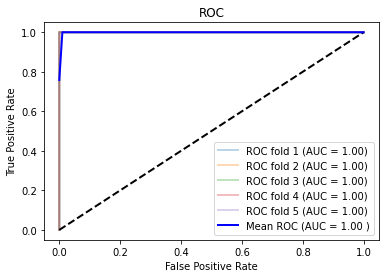

In [ ]:
'''
Adapted from: https://www.kaggle.com/kanncaa1/roc-curve-with-k-fold-cv/notebook
'''

# import necessary packages
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

random_state = np.random.RandomState(0)
clf = RandomForestClassifier(random_state=random_state)
cv = StratifiedKFold(n_splits=5,shuffle=False)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i = 1

for train,test in cv.split(train_X, train_y):
    prediction = clf.fit(train_X.iloc[train],train_y.iloc[train]).predict_proba(train_X.iloc[test])
    fpr, tpr, t = roc_curve(train_y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

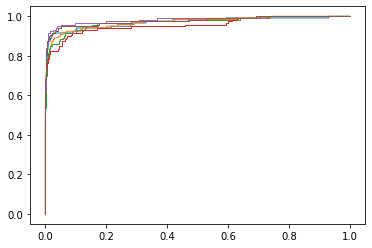

In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Run classifier with crossvalidation and plot ROC curves
cv = StratifiedKFold(n_splits=6 )
classifier = svm.SVC(kernel='linear', probability=True)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv.split(X,y)):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
